# Explore here

In [17]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Eliminar variables

In [18]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Dividir el conjunto de datos en entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


Construir K-Means

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [21]:
centroids = model.cluster_centers_
labels = model.labels_

In [22]:
centroids

array([[   5.37914949,   37.68747253, -121.91549044],
       [   4.34929638,   33.88940929, -118.00301129],
       [   6.94251551,   33.84943618, -118.04112764],
       [   2.42859805,   34.04157015, -118.02425727],
       [  11.74873415,   35.87817073, -120.28422764],
       [   2.73992841,   38.14364263, -121.62299724]])

In [23]:
labels

array([3, 1, 1, ..., 3, 0, 5])

In [24]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


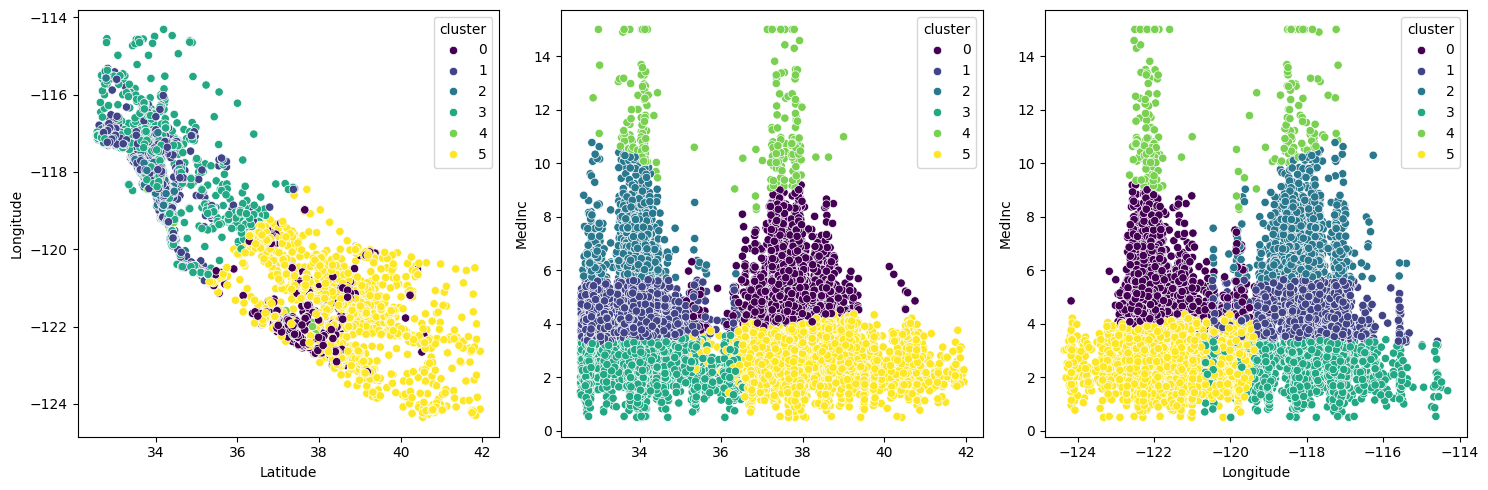

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns



fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "viridis")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "viridis")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "viridis")
plt.tight_layout()

plt.show()

In [28]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
...,...,...,...,...
15362,4.6050,33.36,-117.22,1
16623,2.7266,35.36,-120.83,5
18086,9.2298,37.31,-122.05,4
2144,2.7850,36.77,-119.76,5


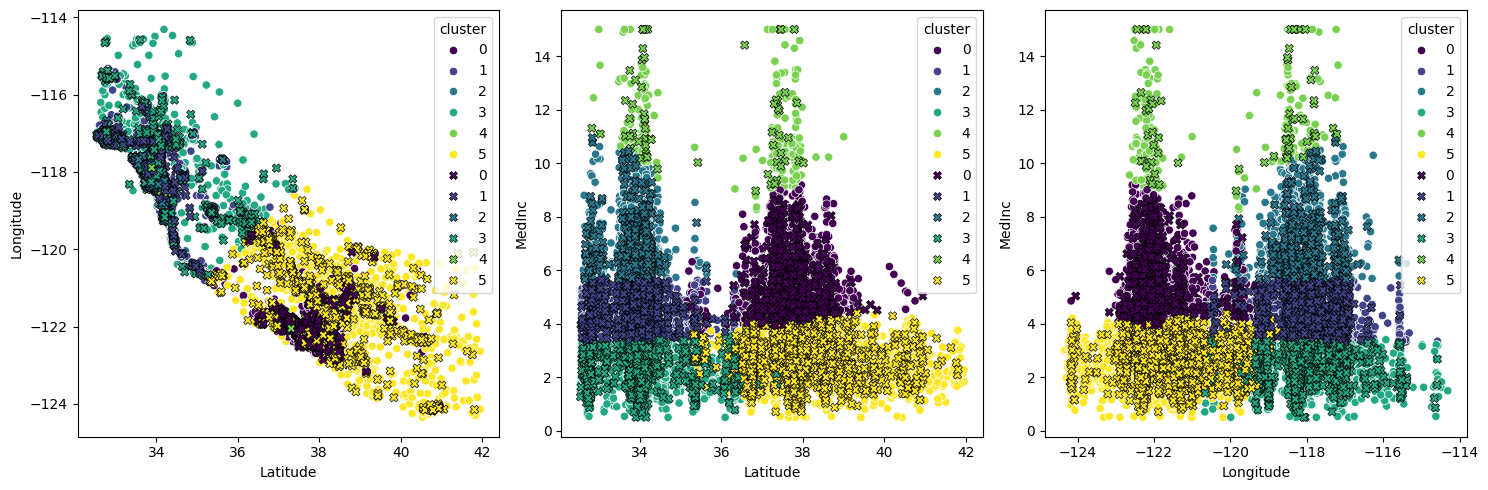

In [29]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "viridis")
sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "viridis", marker='X',edgecolor= 'black')

sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "viridis")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "viridis", marker='X',edgecolor= 'black')

sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "viridis")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "viridis", marker='X',edgecolor= 'black')
plt.tight_layout()

plt.show()

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separar las características y las etiquetas
X_train_features = X_train.drop("cluster", axis=1)
y_train_labels = X_train["cluster"]
X_test_features = X_test.drop("cluster", axis=1)
y_test_labels = X_test["cluster"]

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_features, y_train_labels)

# Predecir las etiquetas del conjunto de prueba
y_pred = rf_model.predict(X_test_features)

# Evaluar el modelo
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred)
conf_matrix = confusion_matrix(y_test_labels, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9963662790697675
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Confusion Matrix:
[[ 558    1    0    0    0    2]
 [   0  982    0    1    0    0]
 [   0    0  299    0    0    0]
 [   0    2    0 1108    0    1]
 [   0    0    2    0   60    0]
 [   3    2    0    1    0 1106]]


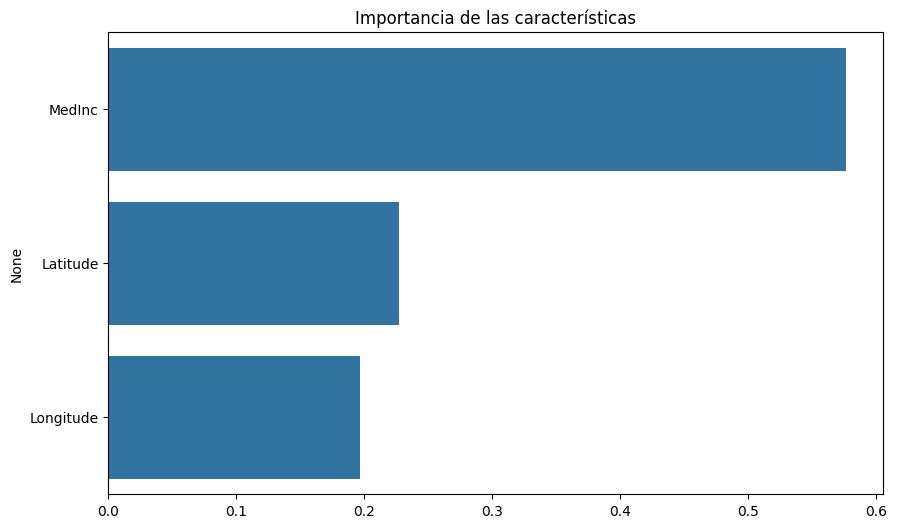

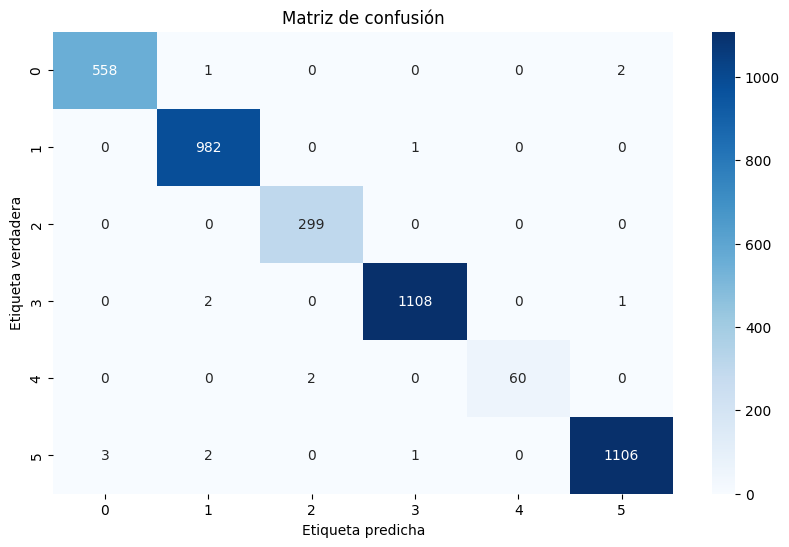

In [32]:
# Visualizar la importancia de las características
feature_importances = rf_model.feature_importances_
features = X_train_features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Importancia de las características")
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()